2. Problem Statement
In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

Step 1: Get the Data (and format it)

In [19]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = pd.read_csv('shampoo-sales.csv')
df.columns = ['Month','Sales of shampoo']

In [4]:
# last value at bottom causing issues
df.drop(36,axis=0,inplace=True)

In [5]:
df.tail()

,Month,Sales of shampoo
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [6]:
# convert our month to the right format
df['Month'] = "190" + df.Month.map(str) 
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.head()

,Month,Sales of shampoo
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [8]:
# set index
df.set_index('Month',inplace=True)

In [9]:
df.head()

,Sales of shampoo
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


Step 2: Visualize the Data

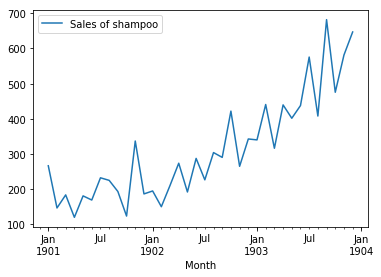

In [10]:
df.plot()

Step 3: Make the time series data stationary

In [11]:
#We have now realized that our data is seasonal from the plot itself. 
#This means we need to use Seasonal ARIMA on our model

#First Difference

df['Sales First Difference'] = df['Sales of shampoo'] - df['Sales of shampoo'].shift(1)

In [12]:
#Testing for Stationarity with Augmented Dickey-Fuller unit root test

def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adf_check(df['Sales First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.249074055553854
p-value : 1.7998574141687034e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


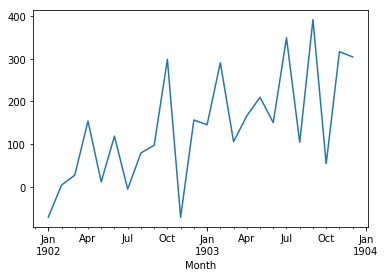

In [14]:
#Seasonal Difference

df['Seasonal Difference'] = df['Sales of shampoo'] - df['Sales of shampoo'].shift(12)
df['Seasonal Difference'].plot()

In [15]:
# Seasonal Difference by itself was not enough!
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.04561553414249077
p-value : 0.9545931714075298
#Lags Used : 6
Number of Observations Used : 17
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


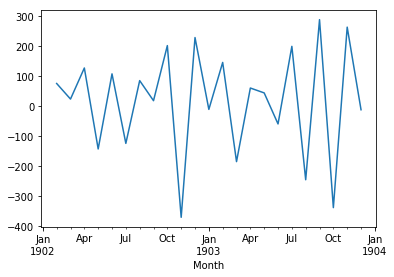

In [16]:
#Seasonal First Difference
df['Seasonal First Difference'] = df['Sales First Difference'] - df['Sales First Difference'].shift(12)
df['Seasonal First Difference'].plot()

In [17]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.356373983478847
p-value : 2.5368941168673004e-08
#Lags Used : 5
Number of Observations Used : 17
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Step 4: Get our final ACF and PACF Plots

C:\Users\cnsasi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


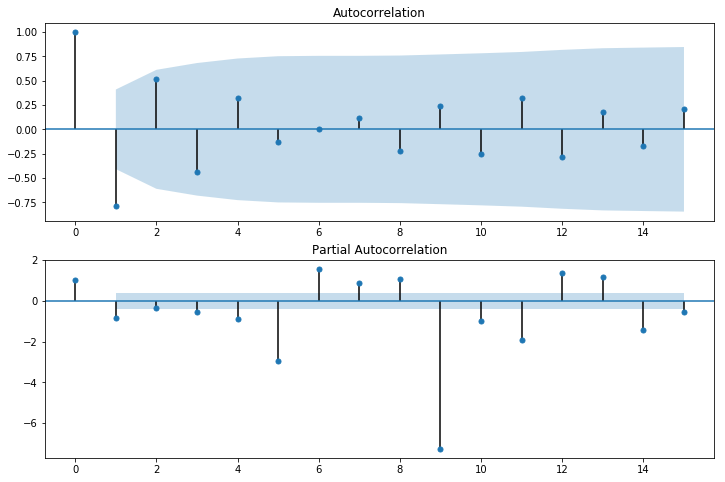

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=15, ax=ax2)

In [21]:
#Using the Seasonal ARIMA model

model = sm.tsa.statespace.SARIMAX(df['Sales of shampoo'],order=(1,1,0), seasonal_order=(1,1,0,12))
results = model.fit()

C:\Users\cnsasi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Step 5: Prediction of Future Values

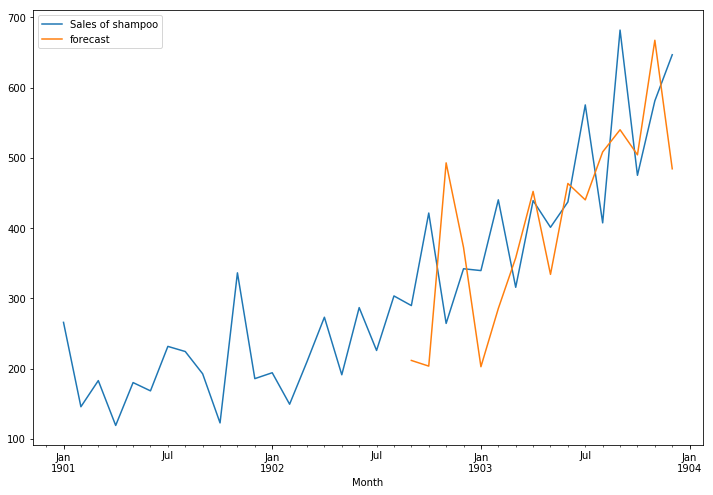

In [28]:
df['forecast'] = results.predict(start = 20, end= 35, dynamic= False)  
df[['Sales of shampoo','forecast']].plot(figsize=(12,8))

Observations:
Prediction value rarely matched with actual data